In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Build and load dataframe

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

#### Build Database

In [35]:
# Build our model.
X = pd.DataFrame(music.loudness)
Y = music.bpm
k_value = 5

# #Test splits
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0)

#### Intial, Unweighted KNN

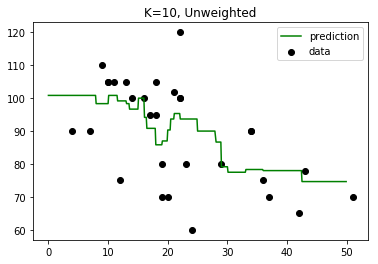

In [29]:
#Build Model
knn = neighbors.KNeighborsRegressor(n_neighbors=k_value)
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

#### Normalize Data by Adding Scaler

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled_raw = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled_raw)

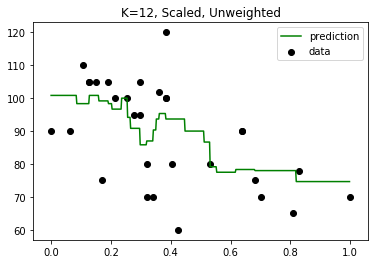

In [31]:
# Run the same model, this time with a normalized variable.
knn_scaled = neighbors.KNeighborsRegressor(n_neighbors=k_value)
knn_scaled.fit(X_scaled, Y)

# Set up our prediction line.
T_scaled = np.arange(0, 1, 0.002)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_scaled = knn_scaled.predict(T_scale)

plt.scatter(X_scaled, Y, c='k', label='data')
plt.plot(T_scale, Y_scaled, c='g', label='prediction')
plt.legend()
plt.title('K=12, Scaled, Unweighted')
plt.show()

#### Weighted, Raw KNN

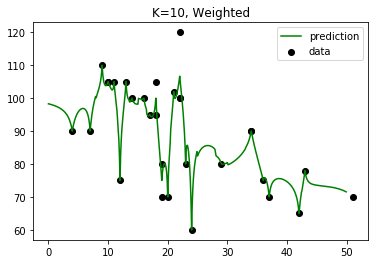

In [32]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=k_value, weights='distance')
knn_w.fit(X, Y)

Y_w = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_w, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

#### Weighted, Scaled KNN

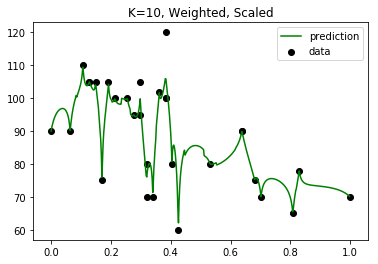

In [33]:
# Run the same model, this time with weights.
knn_w_scaled = neighbors.KNeighborsRegressor(n_neighbors=k_value, weights='distance')
knn_w_scaled.fit(X_scaled, Y)

Y_w_scaled = knn_w_scaled.predict(T_scaled)

plt.scatter(X_scaled, Y, c='k', label='data')
plt.plot(T_scaled, Y_w_scaled, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted, Scaled')
plt.show()

#### Adding in Cross-Validation

In [34]:
#Intial, Unweighted Accuracy
score = cross_val_score(knn, X, Y, cv=2)
print("Initial, Unweighted Accuracy: %0.3f (+/- %0.3f)" % (score.mean(), score.std() * 2))

#Unweighted, Scaled Accuracy
score_scaled = cross_val_score(knn_scaled, X_scaled, Y, cv=2)
print("Unweighted, Scaled Accuracy: %0.3f (+/- %0.3f)" % (score_scaled.mean(), score_scaled.std() * 2))


#Weighted, Raw Accuracy
score_w = cross_val_score(knn_w, X, Y, cv=2)
print("Weighted, Raw Accuracy: %0.3f (+/- %0.3f)" % (score_w_scaled.mean(), score_w_scaled.std() * 2))

# Weighted, Scaled Accuracy
score_w_scaled = cross_val_score(knn_w, X_scaled, Y, cv=2)
print("Weighted, Scaled Accuracy: %0.3f (+/- %0.3f)" % (score_w.mean(), score_w.std() * 2))

Initial, Unweighted Accuracy: 0.262 (+/- 0.064)
Unweighted, Scaled Accuracy: 0.263 (+/- 0.064)
Weighted, Raw Accuracy: 0.348 (+/- 0.262)
Weighted, Scaled Accuracy: 0.370 (+/- 0.285)
